In [6]:
import numpy as np
import pandas as pd
from os import path
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

import PIL
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import matplotlib.pyplot as plt
%matplotlib inline


df_final = pd.read_csv('final_result.csv')
df_body = pd.read_csv('localnews.csv')

df_body = df_body.drop(['Link', 'Index', 'DatePublished', 'Title'], axis=1)
#df_body['Body'] = df['Body'].astype(str)
df_body.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    2316 non-null   object
dtypes: object(1)
memory usage: 18.2+ KB


In [7]:
df_final_with_body = pd.concat([df_final, df_body], axis=1)
df_final_with_body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          2316 non-null   int64  
 1   Title          2316 non-null   object 
 2   DatePublished  2316 non-null   object 
 3   negative       2316 non-null   float64
 4   neutral        2316 non-null   float64
 5   positive       2316 non-null   float64
 6   compound       2316 non-null   float64
 7   sentiment      2316 non-null   object 
 8   fpositive      2316 non-null   float64
 9   fnegative      2316 non-null   float64
 10  fneutral       2316 non-null   float64
 11  score          2316 non-null   float64
 12  label          2316 non-null   object 
 13  Body           2316 non-null   object 
dtypes: float64(8), int64(1), object(5)
memory usage: 253.4+ KB


In [8]:
bodycol = df_final_with_body.pop('Body')
df_final_with_body.insert(3, 'Body', bodycol)
df_final_with_body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          2316 non-null   int64  
 1   Title          2316 non-null   object 
 2   DatePublished  2316 non-null   object 
 3   Body           2316 non-null   object 
 4   negative       2316 non-null   float64
 5   neutral        2316 non-null   float64
 6   positive       2316 non-null   float64
 7   compound       2316 non-null   float64
 8   sentiment      2316 non-null   object 
 9   fpositive      2316 non-null   float64
 10  fnegative      2316 non-null   float64
 11  fneutral       2316 non-null   float64
 12  score          2316 non-null   float64
 13  label          2316 non-null   object 
dtypes: float64(8), int64(1), object(5)
memory usage: 253.4+ KB


In [9]:
df_final_with_body.rename(columns={'negative':'vnegative', 'neutral':'vneutral', 'positive':'vpositive'}, inplace=True)
df_final_with_body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          2316 non-null   int64  
 1   Title          2316 non-null   object 
 2   DatePublished  2316 non-null   object 
 3   Body           2316 non-null   object 
 4   vnegative      2316 non-null   float64
 5   vneutral       2316 non-null   float64
 6   vpositive      2316 non-null   float64
 7   compound       2316 non-null   float64
 8   sentiment      2316 non-null   object 
 9   fpositive      2316 non-null   float64
 10  fnegative      2316 non-null   float64
 11  fneutral       2316 non-null   float64
 12  score          2316 non-null   float64
 13  label          2316 non-null   object 
dtypes: float64(8), int64(1), object(5)
memory usage: 253.4+ KB


In [10]:
df_final_with_body.to_csv('final_with_body.csv', index=False)

In [11]:
df = df_final_with_body[df_final_with_body['label'] == 'negative']
df.head()

,Index,Title,DatePublished,Body,vnegative,vneutral,vpositive,compound,sentiment,fpositive,fnegative,fneutral,score,label
7,7,Tigray aid embezzlement: authorities identify ...,06-19-2023,Regional and federal government officials as w...,0.178,0.767,0.055,-0.9897,negative,0.018252,0.852250,0.129498,0.852250,negative
12,12,Finance Ministry locks in a lean budget with s...,06-19-2023,"The Ministry of Finance (MoF), which earlier t...",0.068,0.775,0.157,0.9940,positive,0.073623,0.745032,0.181345,0.745032,negative
15,15,Cyber attacks bombard Ethiopia,06-12-2023,Kaspersky Global Research and Analysis Team in...,0.239,0.696,0.064,-0.9938,negative,0.030889,0.616898,0.352214,0.616898,negative
22,22,Finance Ministry locks in a lean budget with s...,06-11-2023,"The Ministry of Finance (MoF), which earlier t...",0.064,0.786,0.151,0.9935,positive,0.073623,0.745032,0.181345,0.745032,negative
32,32,"Brace for dry spell, depressed rainfall expert...",05-29-2023,Dry conditions are now being expected in the n...,0.092,0.811,0.097,-0.1885,negative,0.111885,0.754726,0.133389,0.754726,negative


In [40]:
df = df[['Body']]
df.to_csv('body_only.csv', index=False)

In [13]:
df['Body'] = df['Body'].apply(lambda txt: txt.lower())
body_text = " ".join(body for body in df.Body)
text_tokenized = word_tokenize(body_text)

In [21]:
stoplist = ['x',',','.','!',"'",'"',"’",'...',':','“','”','(',')','%','told','usd','report','billion','people','countries','country','million','government','percent','sector','will','according', 'djibouti','year','ethiopia','addis','ethiopian','africa','african','new','birr','y', 'your', 'yours', 'yourself', 'yourselves', 'you', 'yond', 'yonder', 'yon', 'ye', 'yet', 'z', 'zillion', 'j', 'u', 'umpteen', 'usually', 'us', 'username', 'uponed', 'upons', 'uponing', 'upon', 'ups', 'upping', 'upped', 'up', 'unto', 'until', 'unless', 'unlike', 'unliker', 'unlikest', 'under', 'underneath', 'use', 'used', 'usedest', 'r', 'rath', 'rather', 'rathest', 'rathe', 're', 'relate', 'related', 'relatively', 'regarding', 'really', 'res', 'respecting', 'respectively', 'q', 'quite', 'que', 'qua', 'n', 'neither', 'neaths', 'neath', 'nethe', 'nethermost', 'necessary', 'necessariest', 'necessarier', 'never', 'nevertheless', 'nigh', 'nighest', 'nigher', 'nine', 'noone', 'nobody', 'nobodies', 'nowhere', 'nowheres', 'no', 'noes', 'nor', 'nos', 'no-one', 'none', 'not', 'notwithstanding', 'nothings', 'nothing', 'nathless', 'natheless', 't', 'ten', 'tills', 'till', 'tilled', 'tilling', 'to', 'towards', 'toward', 'towardest', 'towarder', 'together', 'too', 'thy', 'thyself', 'thus', 'than', 'that', 'those', 'thou', 'though', 'thous', 'thouses', 'thoroughest', 'thorougher', 'thorough', 'thoroughly', 'thru', 'thruer', 'thruest', 'thro', 'through', 'throughout', 'throughest', 'througher', 'thine', 'this', 'thises', 'they', 'thee', 'the', 'then', 'thence', 'thenest', 'thener', 'them', 'themselves', 'these', 'therer', 'there', 'thereby', 'therest', 'thereafter', 'therein', 'thereupon', 'therefore', 'their', 'theirs', 'thing', 'things', 'three', 'two', 'o', 'oh', 'owt', 'owning', 'owned', 'own', 'owns', 'others', 'other', 'otherwise', 'otherwisest', 'otherwiser', 'of', 'often', 'oftener', 'oftenest', 'off', 'offs', 'offest', 'one', 'ought', 'oughts', 'our', 'ours', 'ourselves', 'ourself', 'out', 'outest', 'outed', 'outwith', 'outs', 'outside', 'over', 'overallest', 'overaller', 'overalls', 'overall', 'overs', 'or', 'orer', 'orest', 'on', 'oneself', 'onest', 'ons', 'onto', 'a', 'atween', 'at', 'athwart', 'atop', 'afore', 'afterward', 'afterwards', 'after', 'afterest', 'afterer', 'ain', 'an', 'any', 'anything', 'anybody', 'anyone', 'anyhow', 'anywhere', 'anent', 'anear', 'and', 'andor', 'another', 'around', 'ares', 'are', 'aest', 'aer', 'against', 'again', 'accordingly', 'abaft', 'abafter', 'abaftest', 'abovest', 'above', 'abover', 'abouter', 'aboutest', 'about', 'aid', 'amidst', 'amid', 'among', 'amongst', 'apartest', 'aparter', 'apart', 'appeared', 'appears', 'appear', 'appearing', 'appropriating', 'appropriate', 'appropriatest', 'appropriates', 'appropriater', 'appropriated', 'already', 'always', 'also', 'along', 'alongside', 'although', 'almost', 'all', 'allest', 'aller', 'allyou', 'alls', 'albeit', 'awfully', 'as', 'aside', 'asides', 'aslant', 'ases', 'astrider', 'astride', 'astridest', 'astraddlest', 'astraddler', 'astraddle', 'availablest', 'availabler', 'available', 'aughts', 'aught', 'vs', 'v', 'variousest', 'variouser', 'various', 'via', 'vis-a-vis', 'vis-a-viser', 'vis-a-visest', 'viz', 'very', 'veriest', 'verier', 'versus', 'k', 'g', 'go', 'gone', 'good', 'got', 'gotta', 'gotten', 'get', 'gets', 'getting', 'b', 'by', 'byandby', 'by-and-by', 'bist', 'both', 'but', 'buts', 'be', 'beyond', 'because', 'became', 'becomes', 'become', 'becoming', 'becomings', 'becominger', 'becomingest', 'behind', 'behinds', 'before', 'beforehand', 'beforehandest', 'beforehander', 'bettered', 'betters', 'better', 'bettering', 'betwixt', 'between', 'beneath', 'been', 'below', 'besides', 'beside', 'm', 'my', 'myself', 'mucher', 'muchest', 'much', 'must', 'musts', 'musths', 'musth', 'main', 'make', 'mayest', 'many', 'mauger', 'maugre', 'me', 'meanwhiles', 'meanwhile', 'mostly', 'most', 'moreover', 'more', 'might', 'mights', 'midst', 'midsts', 'h', 'huh', 'humph', 'he', 'hers', 'herself', 'her', 'hereby', 'herein', 'hereafters', 'hereafter', 'hereupon', 'hence', 'hadst', 'had', 'having', 'haves', 'have', 'has', 'hast', 'hardly', 'hae', 'hath', 'him', 'himself', 'hither', 'hitherest', 'hitherer', 'his', 'how-do-you-do', 'however', 'how', 'howbeit', 'howdoyoudo', 'hoos', 'hoo', 'w', 'woulded', 'woulding', 'would', 'woulds', 'was', 'wast', 'we', 'wert', 'were', 'with', 'withal', 'without', 'within', 'why', 'what', 'whatever', 'whateverer', 'whateverest', 'whatsoeverer', 'whatsoeverest', 'whatsoever', 'whence', 'whencesoever', 'whenever', 'whensoever', 'when', 'whenas', 'whether', 'wheen', 'whereto', 'whereupon', 'wherever', 'whereon', 'whereof', 'where', 'whereby', 'wherewithal', 'wherewith', 'whereinto', 'wherein', 'whereafter', 'whereas', 'wheresoever', 'wherefrom', 'which', 'whichever', 'whichsoever', 'whilst', 'while', 'whiles', 'whithersoever', 'whither', 'whoever', 'whosoever', 'whoso', 'whose', 'whomever', 's', 'syne', 'syn', 'shalling', 'shall', 'shalled', 'shalls', 'shoulding', 'should', 'shoulded', 'shoulds', 'she', 'sayyid', 'sayid', 'said', 'saider', 'saidest', 'same', 'samest', 'sames', 'samer', 'saved', 'sans', 'sanses', 'sanserifs', 'sanserif', 'so', 'soer', 'soest', 'sobeit', 'someone', 'somebody', 'somehow', 'some', 'somewhere', 'somewhat', 'something', 'sometimest', 'sometimes', 'sometimer', 'sometime', 'several', 'severaler', 'severalest', 'serious', 'seriousest', 'seriouser', 'senza', 'send', 'sent', 'seem', 'seems', 'seemed', 'seemingest', 'seeminger', 'seemings', 'seven', 'summat', 'sups', 'sup', 'supping', 'supped', 'such', 'since', 'sine', 'sines', 'sith', 'six', 'stop', 'stopped', 'p', 'plaintiff', 'plenty', 'plenties', 'please', 'pleased', 'pleases', 'per', 'perhaps', 'particulars', 'particularly', 'particular', 'particularest', 'particularer', 'pro', 'providing', 'provides', 'provided', 'provide', 'probably', 'l', 'layabout', 'layabouts', 'latter', 'latterest', 'latterer', 'latterly', 'latters', 'lots', 'lotting', 'lotted', 'lot', 'lest', 'less', 'ie', 'ifs', 'if', 'i', 'info', 'information', 'itself', 'its', 'it', 'is', 'idem', 'idemer', 'idemest', 'immediate', 'immediately', 'immediatest', 'immediater', 'in', 'inwards', 'inwardest', 'inwarder', 'inward', 'inasmuch', 'into', 'instead', 'insofar', 'indicates', 'indicated', 'indicate', 'indicating', 'indeed', 'inc', 'f', 'fact', 'facts', 'fs', 'figupon', 'figupons', 'figuponing', 'figuponed', 'few', 'fewer', 'fewest', 'frae', 'from', 'failing', 'failings', 'five', 'furthers', 'furtherer', 'furthered', 'furtherest', 'further', 'furthering', 'furthermore', 'fourscore', 'followthrough', 'for', 'forwhy', 'fornenst', 'formerly', 'former', 'formerer', 'formerest', 'formers', 'forbye', 'forby', 'fore', 'forever', 'forer', 'fores', 'four', 'd', 'ddays', 'dday', 'do', 'doing', 'doings', 'doe', 'does', 'doth', 'downwarder', 'downwardest', 'downward', 'downwards', 'downs', 'done', 'doner', 'dones', 'donest', 'dos', 'dost', 'did', 'differentest', 'differenter', 'different', 'describing', 'describe', 'describes', 'described', 'despiting', 'despites', 'despited', 'despite', 'during', 'c', 'cum', 'circa', 'chez', 'cer', 'certain', 'certainest', 'certainer', 'cest', 'canst', 'cannot', 'cant', 'cants', 'canting', 'cantest', 'canted', 'co', 'could', 'couldst', 'comeon', 'comeons', 'come-ons', 'come-on', 'concerning', 'concerninger', 'concerningest', 'consequently', 'considering', 'e', 'eg', 'eight', 'either', 'even', 'evens', 'evenser', 'evensest', 'evened', 'evenest', 'ever', 'everyone', 'everything', 'everybody', 'everywhere', 'every', 'ere', 'each', 'et', 'etc', 'elsewhere', 'else', 'ex', 'excepted', 'excepts', 'except', 'excepting', 'exes', 'enough']

In [22]:
stopwords = set(STOPWORDS)
stopwords.update(stoplist)
corpus = [x for x in text_tokenized if x not in stopwords]
type(corpus)

list

In [23]:
fdist = FreqDist(corpus)
fdist1 = fdist.most_common(20)
fdist1

[('capital', 493),
 ('bank', 439),
 ('last', 380),
 ('years', 354),
 ('health', 341),
 ('ministry', 339),
 ('company', 339),
 ('market', 337),
 ('international', 328),
 ('industry', 326),
 ('region', 325),
 ('currency', 316),
 ('development', 305),
 ('price', 302),
 ('due', 292),
 ('tax', 292),
 ('economic', 288),
 ('time', 288),
 ('budget', 286),
 ('trade', 281)]

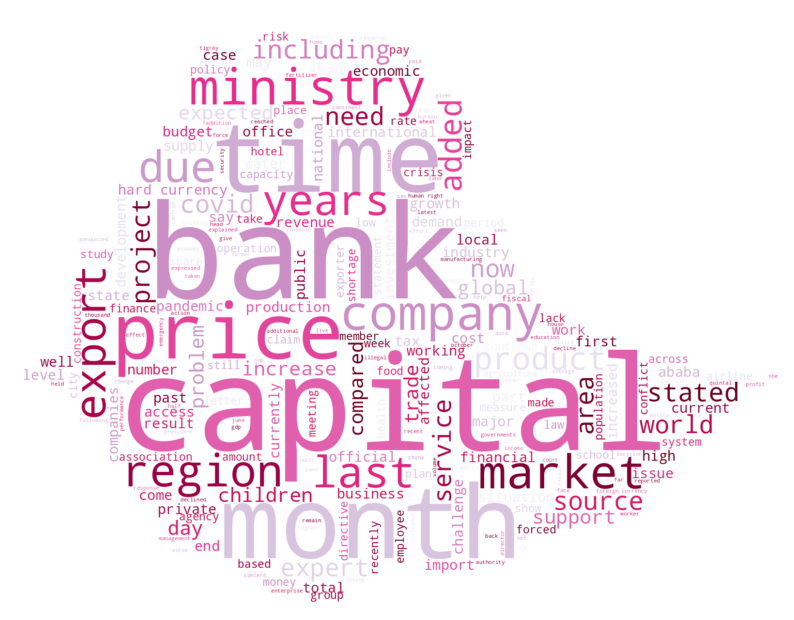

In [39]:
eth_mask = np.array(Image.open("transparent.png"))

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=250, mask=eth_mask,
               font_step=2,
               colormap='PuRd',
               stopwords=stopwords, width=1920, height=1080)

# Generate a wordcloud
wc.generate(body_text)

# store to file
wc.to_file("word_cloud_negative3.png")

# show
plt.figure(figsize=[10,30])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()